<a href="https://colab.research.google.com/github/lazuwarda/User-segmentation/blob/main/User_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# USER SEGMENTATION USING RFM ANALYSIS

In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

## Gathering Data

In [207]:
sales1_df=pd.read_csv("https://raw.githubusercontent.com/lazuwarda/User-segmentation/main/Sales%201.csv")
sales2_df=pd.read_csv("https://raw.githubusercontent.com/lazuwarda/User-segmentation/main/Sales%202.csv")

In [208]:
sales_df=sales1_df.append(sales2_df)
sales_df.head()

<ipython-input-208-d6a9d414c834>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sales_df=sales1_df.append(sales2_df)


,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


## Data Assessing and Data Cleaning

In [209]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536350 entries, 0 to 268174
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


- karena banyaknya data atribut customerNo, berbeda maka kemungkinan ada missing value
- tipe data atribut date harusnya date time
- CustomerNo harusnya int

In [210]:
sales_df.isna().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

Terdapat Missing value

In [211]:
print("Jumlah duplikasi: ", sales_df.duplicated().sum())

Jumlah duplikasi:  5200


Terdapat data terduplikasi

In [212]:
#Menghapus duplicate data
sales_df.drop_duplicates(inplace=True)

In [213]:
#Menghapus Missing Value
sales_df.dropna(subset=['CustomerNo'], inplace=True)

In [214]:
#Mengubah type data date
sales_df["Date"] = pd.to_datetime(sales_df["Date"])

In [215]:
#mengubah type data CustomerNo
sales_df[['CustomerNo']] = sales_df[['CustomerNo']].astype(int). astype(str)

In [216]:
# membuat kolom order_status dengan nilai 'cancelled' jika TransactionNo diawali dengan huruf 'C' dan 'delivered' jika order_id tanpa awalan huruf 'C'
sales_df['order_status'] = np.where(sales_df['TransactionNo'].str[:1]=='C', 'cancelled', 'delivered')

In [217]:
# membuat nilai amount, yaitu perkalian antara quantity dan price
sales_df['Amount'] = sales_df['Quantity'] * sales_df['Price']

In [218]:
# menghapus outlier
from scipy import stats
sales_df = sales_df[(np.abs(stats.zscore(sales_df[['Quantity','Amount']]))<3).all(axis=1)]
sales_df = sales_df.reset_index(drop=True)

cek ulang

In [219]:
sales_df.isna().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
order_status     0
Amount           0
dtype: int64

In [220]:
print("Jumlah duplikasi: ", sales_df.duplicated().sum())

Jumlah duplikasi:  0


In [221]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530800 entries, 0 to 530799
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  530800 non-null  object        
 1   Date           530800 non-null  datetime64[ns]
 2   ProductNo      530800 non-null  object        
 3   ProductName    530800 non-null  object        
 4   Price          530800 non-null  float64       
 5   Quantity       530800 non-null  int64         
 6   CustomerNo     530800 non-null  object        
 7   Country        530800 non-null  object        
 8   order_status   530800 non-null  object        
 9   Amount         530800 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 40.5+ MB


In [222]:
sales_df.describe()

,Price,Quantity,Amount
count,530800.000000,530800.000000,530800.000000
mean,12.670366,9.475511,106.699492
std,8.528324,25.140790,277.500320
min,5.130000,-600.000000,-6552.000000
25%,10.990000,1.000000,16.180000
50%,11.940000,3.000000,43.440000
75%,14.090000,10.000000,119.400000
max,660.620000,640.000000,6958.080000


In [223]:
sales_df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,order_status,Amount
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490,United Kingdom,delivered,257.64
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069,United Kingdom,delivered,383.40
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069,United Kingdom,delivered,138.36
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069,United Kingdom,delivered,127.80
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069,United Kingdom,delivered,71.64
...,...,...,...,...,...,...,...,...,...,...
530795,C536548,2018-12-01,22168,Organiser Wood Antique White,18.96,-2,12472,Germany,cancelled,-37.92
530796,C536548,2018-12-01,21218,Red Spotty Biscuit Tin,14.09,-3,12472,Germany,cancelled,-42.27
530797,C536548,2018-12-01,20957,Porcelain Hanging Bell Small,11.74,-1,12472,Germany,cancelled,-11.74
530798,C536548,2018-12-01,22580,Advent Calendar Gingham Sack,16.35,-4,12472,Germany,cancelled,-65.40


## RFM Analysis

Membuat Dataframe User dan riwayat transaksinya

In [224]:
user_df = sales_df.groupby('CustomerNo', as_index=False).agg(order_cnt=('TransactionNo','nunique'),max_order_date=('Date','max'),total_order_value=('Amount','sum'))
user_df

,CustomerNo,order_cnt,max_order_date,total_order_value
0,12004,1,2019-04-26,1509.60
1,12006,1,2019-05-05,24.76
2,12008,1,2019-03-08,5689.57
3,12013,1,2018-12-15,69.96
4,12024,1,2019-06-16,149.52
...,...,...,...,...
4725,18280,1,2019-03-07,623.26
4726,18281,1,2019-06-12,576.58
4727,18282,3,2019-12-02,992.11
4728,18283,16,2019-12-06,11773.90


Membuat kolom lama hari dari terakhir order

In [225]:
today = sales_df['Date'].max()
user_df['Day_since_last_order'] = (today - user_df['max_order_date']).dt.days
user_df

,CustomerNo,order_cnt,max_order_date,total_order_value,Day_since_last_order
0,12004,1,2019-04-26,1509.60,227
1,12006,1,2019-05-05,24.76,218
2,12008,1,2019-03-08,5689.57,276
3,12013,1,2018-12-15,69.96,359
4,12024,1,2019-06-16,149.52,176
...,...,...,...,...,...
4725,18280,1,2019-03-07,623.26,277
4726,18281,1,2019-06-12,576.58,180
4727,18282,3,2019-12-02,992.11,7
4728,18283,16,2019-12-06,11773.90,3


In [226]:
user_df.describe()

,order_cnt,total_order_value,Day_since_last_order
count,4730.000000,4.730000e+03,4730.000000
mean,4.882452,1.197380e+04,95.343552
std,8.777105,4.580136e+04,102.237589
min,1.000000,-3.736320e+03,0.000000
25%,1.000000,1.764950e+03,17.000000
50%,3.000000,4.626470e+03,52.000000
75%,5.000000,1.148687e+04,155.000000
max,241.000000,1.996595e+06,373.000000


Membuat skor recency dari 1-5 berdasarkan nilai persentil 20, percentil 40, percentil 60 dan percentil 80

In [227]:
user_df['Recency_score'] = pd.cut(user_df['Day_since_last_order'],
                                  bins=[user_df['Day_since_last_order'].min(),
                                        np.percentile(user_df['Day_since_last_order'], 20),
                                        np.percentile(user_df['Day_since_last_order'], 40),
                                        np.percentile(user_df['Day_since_last_order'], 60),
                                        np.percentile(user_df['Day_since_last_order'], 80),
                                        user_df['Day_since_last_order'].max()],
                                  labels=[5, 4, 3, 2, 1],
                                  include_lowest=True).astype(int)
user_df

,CustomerNo,order_cnt,max_order_date,total_order_value,Day_since_last_order,Recency_score
0,12004,1,2019-04-26,1509.60,227,1
1,12006,1,2019-05-05,24.76,218,1
2,12008,1,2019-03-08,5689.57,276,1
3,12013,1,2018-12-15,69.96,359,1
4,12024,1,2019-06-16,149.52,176,2
...,...,...,...,...,...,...
4725,18280,1,2019-03-07,623.26,277,1
4726,18281,1,2019-06-12,576.58,180,2
4727,18282,3,2019-12-02,992.11,7,5
4728,18283,16,2019-12-06,11773.90,3,5


Membuat skor frekuensi dari 1-5 berdasarkan nilai persentil 20, percentil 40, percentil 60 dan percentil 80

In [228]:
user_df['Frequency_score'] = pd.cut(user_df['order_cnt'],
                                  bins=[0,
                                        np.percentile(user_df['order_cnt'], 20),
                                        np.percentile(user_df['order_cnt'], 40),
                                        np.percentile(user_df['order_cnt'], 60),
                                        np.percentile(user_df['order_cnt'], 80),
                                        user_df['order_cnt'].max()],
                                  labels=[1,2,3,4,5],
                                  include_lowest=True).astype(int)
user_df

,CustomerNo,order_cnt,max_order_date,total_order_value,Day_since_last_order,Recency_score,Frequency_score
0,12004,1,2019-04-26,1509.60,227,1,1
1,12006,1,2019-05-05,24.76,218,1,1
2,12008,1,2019-03-08,5689.57,276,1,1
3,12013,1,2018-12-15,69.96,359,1,1
4,12024,1,2019-06-16,149.52,176,2,1
...,...,...,...,...,...,...,...
4725,18280,1,2019-03-07,623.26,277,1,1
4726,18281,1,2019-06-12,576.58,180,2,1
4727,18282,3,2019-12-02,992.11,7,5,3
4728,18283,16,2019-12-06,11773.90,3,5,5


Membuat skor monetary dari 1-5 berdasarkan nilai persentil 20, percentil 40, percentil 60 dan percentil 80

In [229]:
user_df['Monetary_score'] = pd.cut(user_df['total_order_value'],
                                  bins=[user_df['total_order_value'].min(),
                                        np.percentile(user_df['total_order_value'], 20),
                                        np.percentile(user_df['total_order_value'], 40),
                                        np.percentile(user_df['total_order_value'], 60),
                                        np.percentile(user_df['total_order_value'], 80),
                                        user_df['total_order_value'].max()],
                                  labels=[1,2,3,4,5],
                                  include_lowest=True).astype(int)
user_df

,CustomerNo,order_cnt,max_order_date,total_order_value,Day_since_last_order,Recency_score,Frequency_score,Monetary_score
0,12004,1,2019-04-26,1509.60,227,1,1,2
1,12006,1,2019-05-05,24.76,218,1,1,1
2,12008,1,2019-03-08,5689.57,276,1,1,3
3,12013,1,2018-12-15,69.96,359,1,1,1
4,12024,1,2019-06-16,149.52,176,2,1,1
...,...,...,...,...,...,...,...,...
4725,18280,1,2019-03-07,623.26,277,1,1,1
4726,18281,1,2019-06-12,576.58,180,2,1,1
4727,18282,3,2019-12-02,992.11,7,5,3,1
4728,18283,16,2019-12-06,11773.90,3,5,5,4


Buat kolom nama segmen berdasarkan skor recency dan frequency

In [230]:
user_df['Segment'] = np.select(
    [(user_df['Recency_score']==5) & (user_df['Frequency_score']>=4),
     (user_df['Recency_score'].between(3, 4)) & (user_df['Frequency_score']>=4),
     (user_df['Recency_score']>=4) & (user_df['Frequency_score'].between(2, 3)),
     (user_df['Recency_score']<=2) & (user_df['Frequency_score']==5),
     (user_df['Recency_score']==3) & (user_df['Frequency_score']==3),
     (user_df['Recency_score']==5) & (user_df['Frequency_score']==1),
     (user_df['Recency_score']==4) & (user_df['Frequency_score']==1),
     (user_df['Recency_score']<=2) & (user_df['Frequency_score'].between(3, 4)),
     (user_df['Recency_score']==3) & (user_df['Frequency_score']<=2),
     (user_df['Recency_score']<=2) & (user_df['Frequency_score']<=2)],
    ['01-Champion', '02-Loyal Customers', '03-Potential Loyalists', "04-Can't Lose Them", '05-Need Attention',
     '06-New Customers', '07-Promising', '08-At Risk', '09-About to Sleep', '10-Hibernating']
)
user_df

,CustomerNo,order_cnt,max_order_date,total_order_value,Day_since_last_order,Recency_score,Frequency_score,Monetary_score,Segment
0,12004,1,2019-04-26,1509.60,227,1,1,2,10-Hibernating
1,12006,1,2019-05-05,24.76,218,1,1,1,10-Hibernating
2,12008,1,2019-03-08,5689.57,276,1,1,3,10-Hibernating
3,12013,1,2018-12-15,69.96,359,1,1,1,10-Hibernating
4,12024,1,2019-06-16,149.52,176,2,1,1,10-Hibernating
...,...,...,...,...,...,...,...,...,...
4725,18280,1,2019-03-07,623.26,277,1,1,1,10-Hibernating
4726,18281,1,2019-06-12,576.58,180,2,1,1,10-Hibernating
4727,18282,3,2019-12-02,992.11,7,5,3,1,03-Potential Loyalists
4728,18283,16,2019-12-06,11773.90,3,5,5,4,01-Champion


In [238]:
summary = pd.pivot_table(user_df, index='Segment',
               values=['CustomerNo','Day_since_last_order','order_cnt','total_order_value'],
               aggfunc={'CustomerNo': pd.Series.nunique,
                        'Day_since_last_order': [np.mean, np.median],
                        'order_cnt': [np.mean, np.median],
                        'total_order_value': [np.mean, np.median]})
summary['pct_unique'] = (summary['CustomerNo'] / summary['CustomerNo'].sum() * 100).round(1)
summary

CustomerNo Day_since_last_order         order_cnt  \
                          nunique                 mean median       mean   
Segment                                                                    
01-Champion                   699             5.091559    4.0  14.055794   
02-Loyal Customers            874            33.772311   29.0   7.729977   
03-Potential Loyalists        474            16.215190   16.0   2.419831   
04-Can't Lose Them             66           137.590909  108.0   9.545455   
05-Need Attention             125            51.688000   51.0   3.000000   
06-New Customers               67             6.194030    7.0   1.000000   
07-Promising                  150            23.646667   24.0   1.000000   
08-At Risk                    428           149.303738  136.0   3.873832   
09-About to Sleep             459            54.311547   53.0   1.446623   
10-Hibernating               1388           217.491354  214.0   1.312680   

                              total_order_value            pct_unique  
                       median              mean     median             
Segment                                                                
01-Champion               9.0      37824.366223  16023.910       14.8  
02-Loyal Customers        6.0      17878.695355  12006.370       18.5  
03-Potential Loyalists    2.0       5011.617616   3509.720       10.0  
04-Can't Lose Them        8.0      16496.546061  11936.735        1.4  
05-Need Attention         3.0       6823.311280   4975.120        2.6  
06-New Customers          1.0       1605.110299    925.640        1.4  
07-Promising              1.0       4831.880933   1624.910        3.2  
08-At Risk                4.0       7561.450140   5612.385        9.0  
09-About to Sleep         1.0       3772.263355   2508.620        9.7  
10-Hibernating            1.0       3208.639661   1746.450       29.3

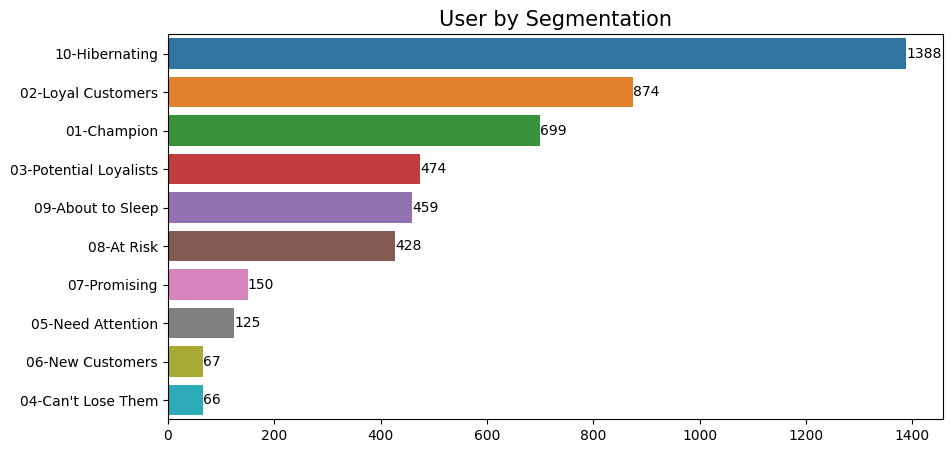

In [261]:
bysegment_df=user_df.groupby('Segment').CustomerNo.nunique().sort_values(ascending=True).reset_index()
plt.figure(figsize=(10, 5))

splot=sns.barplot(
    x='CustomerNo',
    y='Segment',
    data=bysegment_df.sort_values(by="CustomerNo", ascending=False),
)
plt.title("User by Segmentation", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.bar_label(splot.containers[0])
plt.show()

In [233]:
!pip install squarify
import squarify

In [253]:
summary=summary.sort_values(by=['pct_unique'])

In [254]:
perc=summary['pct_unique']
perc

Segment
04-Can't Lose Them         1.4
06-New Customers           1.4
05-Need Attention          2.6
07-Promising               3.2
08-At Risk                 9.0
09-About to Sleep          9.7
03-Potential Loyalists    10.0
01-Champion               14.8
02-Loyal Customers        18.5
10-Hibernating            29.3
Name: pct_unique, dtype: float64

(0.0, 100.0, 0.0, 100.0)

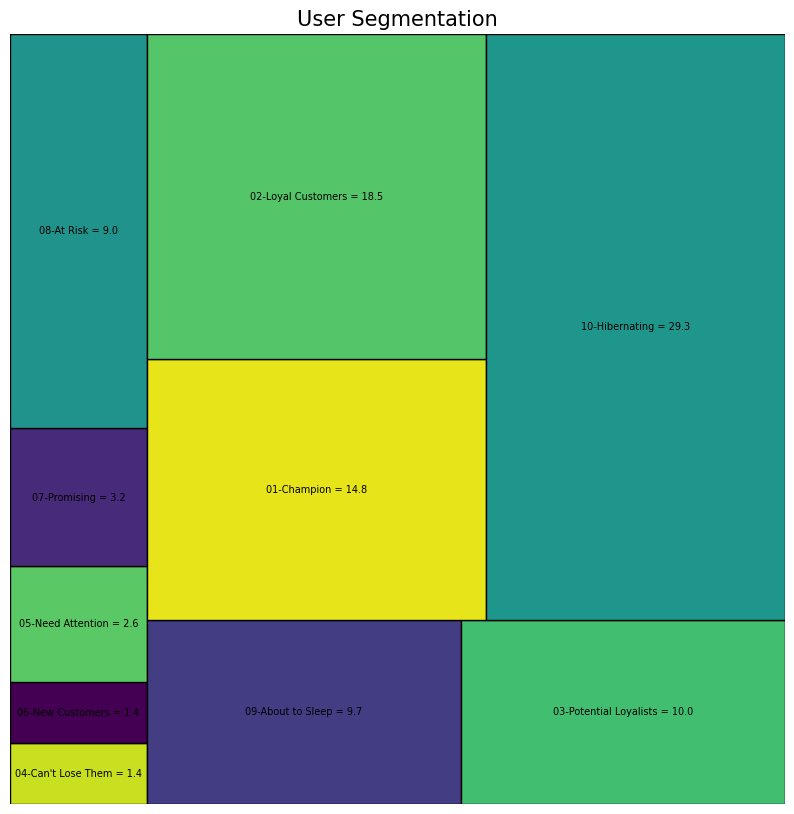

In [274]:
plt.figure(figsize=(10, 10))
lbl = [f'{el[0]} = {el[1]}' for el in zip(bysegment_df['Segment'], perc)]
squarify.plot(sizes=bysegment_df['CustomerNo'], label=lbl, ec = 'black', bar_kwargs={'alpha':1}, text_kwargs={'fontsize':7})
plt.title("User Segmentation", loc="center", fontsize=15)
plt.axis("off")